In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

/Users/buraktahtaci/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
%matplotlib inline  


In [3]:
def one_hot_labeling(class_name):
    if class_name == "headphone":
        return(np.array([1,0,0,0,0,0,0,0,0,0]))
    elif class_name == "butterfly":
        return(np.array([0,1,0,0,0,0,0,0,0,0]))
    elif class_name == "cup":
        return(np.array([0,0,1,0,0,0,0,0,0,0]))
    elif class_name == "airplanes":
        return(np.array([0,0,0,1,0,0,0,0,0,0]))
    elif class_name == "dolphin":
        return(np.array([0,0,0,0,1,0,0,0,0,0]))
    elif class_name == "cellphone":
        return(np.array([0,0,0,0,0,1,0,0,0,0]))
    elif class_name == "car_side":
        return(np.array([0,0,0,0,0,0,1,0,0,0]))
    elif class_name == "laptop":
        return(np.array([0,0,0,0,0,0,0,1,0,0]))
    elif class_name == "pizza":
        return(np.array([0,0,0,0,0,0,0,0,1,0]))
    elif class_name == "Motorbikes":
        return(np.array([0,0,0,0,0,0,0,0,0,1]))

In [4]:
def id_to_label(c_id):
    if c_id == 0:
        return "headphone"
    elif c_id == 1:
        return "butterfly"
    elif c_id == 2:
        return "cup"
    elif c_id == 3:
        return "airplane"
    elif c_id == 4:
        return "dolphin"
    elif c_id == 5:
        return "cell_phone"
    elif c_id == 6:
        return "car_side"
    elif c_id == 7:
        return "laptop"
    elif c_id == 8:
        return "pizza"
    elif c_id == 9:
        return "Motorbikes"

In [7]:
def read_dataset(path):
    IMG_SIZE = 200
    classes = os.listdir(path)
    classes.remove('.DS_Store')
    dataset = []
    
    for cls in classes:
        images = os.listdir(path+"/"+cls)
        for img in images:
            image = Image.open(path+"/"+"/"+cls+"/"+img)
            image = image.convert('L')
            image = image.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            
            dataset.append([np.array(image),one_hot_labeling(cls)])
            
            image = Image.open(path+"/"+"/"+cls+"/"+img)
            image = image.convert('L')
            image = image.rotate(90)
            image = image.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            
            dataset.append([np.array(image),one_hot_labeling(cls)])
            
            image = Image.open(path+"/"+"/"+cls+"/"+img)
            image = image.convert('L')
            image = image.rotate(270)
            image = image.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            
            dataset.append([np.array(image),one_hot_labeling(cls)])

    random.shuffle(dataset)
    return dataset


In [8]:
dataset = read_dataset('Dataset')

In [9]:
train_dataset = dataset[int(len(dataset)/5):]
test_dataset = dataset[:int(len(dataset)/5)]

print(len(train_dataset))
print(len(test_dataset))
#plt.imshow(test_dataset[13][0], cmap = 'gist_gray')


5206
1301


In [10]:
IMG_SIZE = 200
trainImages = np.array([i[0] for i in train_dataset]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_dataset])


In [11]:
IMG_SIZE = 200
testImages = np.array([i[0] for i in test_dataset]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_dataset])



In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [14]:
model.fit(trainImages,trainLabels, batch_size = 50, epochs = 2, verbose = 1)

Epoch 1/2
5206/5206 [==============================] - 405s 78ms/step - loss: 0.1098 - acc: 0.9643
Epoch 2/2
5206/5206 [==============================] - 398s 76ms/step - loss: 0.0650 - acc: 0.9768


In [12]:
test_loss, test_acc = model.evaluate(testImages, testLabels)

print('Test accuracy:', test_acc)

867/867 [==============================] - 19s 21ms/step
Test accuracy: 0.977277976625106


In [16]:
predictions = model.predict(testImages)

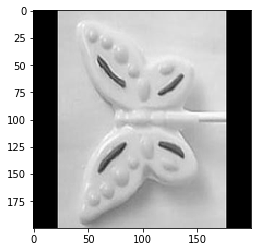

In [24]:
for i in range(len(predictions)):
    if np.argmax(predictions[i]) != np.argmax(testLabels[i]):
        plt.imshow(test_dataset[i][0], cmap = 'gist_gray')


In [16]:
IMG_SIZE = 200
def test_one_image(path):
    image = Image.open(path)
    image = image.convert('L')
    image = image.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    predictions = model.predict(np.array(image).reshape(-1, IMG_SIZE, IMG_SIZE, 1))
    return id_to_label(np.argmax(predictions))

In [17]:
for f in os.listdir("validasyon"):
    if f != ".DS_Store":
        print("File -> ",f," Prediction ->",test_one_image("validasyon/"+f))

File ->  motosiklet4.jpeg  Prediction -> Motorbikes
File ->  pizza2.jpeg  Prediction -> Motorbikes
File ->  headphone3.jpeg  Prediction -> laptop
File ->  ucak4.jpeg  Prediction -> airplane
File ->  laptop4.jpeg  Prediction -> Motorbikes
File ->  ucak5.jpeg  Prediction -> Motorbikes
File ->  laptop5.jpeg  Prediction -> Motorbikes
File ->  pizza.jpeg  Prediction -> Motorbikes
File ->  cup.jpeg  Prediction -> laptop
File ->  headphone2.jpeg  Prediction -> Motorbikes
File ->  pizza3.jpeg  Prediction -> butterfly
File ->  motosiklet5.jpeg  Prediction -> Motorbikes
File ->  dolphin.jpeg  Prediction -> Motorbikes
File ->  ucak2.jpeg  Prediction -> airplane
File ->  laptop2.jpeg  Prediction -> Motorbikes
File ->  motosiklet2.jpeg  Prediction -> Motorbikes
File ->  headphone.jpeg  Prediction -> headphone
File ->  cell.jpeg  Prediction -> Motorbikes
File ->  pizza4.jpeg  Prediction -> Motorbikes
File ->  car.jpeg  Prediction -> Motorbikes
File ->  headphone5.jpeg  Prediction -> laptop
File ->  